In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [9]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             matthews_corrcoef, classification_report)

In [11]:
from imblearn.over_sampling import SMOTE

In [13]:
url = "https://raw.githubusercontent.com/ApoorvaKrisna/NASA-promise-dataset-repository/main/kc1.csv"
dataset = pd.read_csv(url)
print("\n🔹 Dataset Shape Before Any Processing:", dataset.shape)


🔹 Dataset Shape Before Any Processing: (2109, 22)


In [15]:
print("🔹 Dataset Shape Before Any Processing:", dataset.shape)
print("\n🔹 First 5 Rows of the Dataset:")
print(dataset.head())

🔹 Dataset Shape Before Any Processing: (2109, 22)

🔹 First 5 Rows of the Dataset:
    loc  v(g)  ev(g)  iv(g)      n       v     l      d      i         e  ...  \
0   1.1   1.4    1.4    1.4    1.3    1.30  1.30   1.30   1.30      1.30  ...   
1   1.0   1.0    1.0    1.0    1.0    1.00  1.00   1.00   1.00      1.00  ...   
2  83.0  11.0    1.0   11.0  171.0  927.89  0.04  23.04  40.27  21378.61  ...   
3  46.0   8.0    6.0    8.0  141.0  769.78  0.07  14.86  51.81  11436.73  ...   
4  25.0   3.0    1.0    3.0   58.0  254.75  0.11   9.35  27.25   2381.95  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2      65         10        6                  0     18.0       25.0   
3      37          2        5                  0     16.0       28.0   
4      21          0        2                  0     11.0       10.0   

In [17]:
X = dataset.drop(columns=['defects'])
y = dataset['defects']

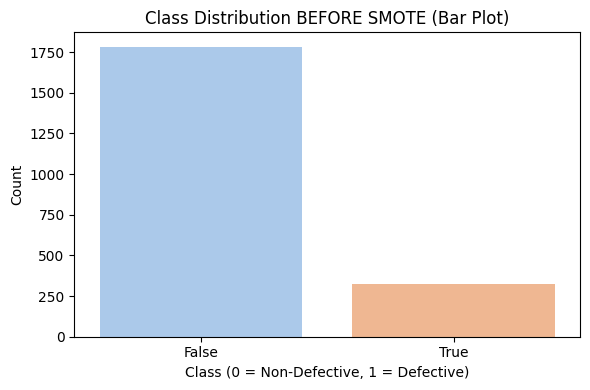

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="pastel")
plt.title("Class Distribution BEFORE SMOTE (Bar Plot)")
plt.xlabel("Class (0 = Non-Defective, 1 = Defective)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [21]:
low_var = [col for col in X.columns if X[col].std() == 0]
if low_var:
    print("Dropping low-variance columns:", low_var)
    X = X.drop(columns=low_var)

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("\n📈 Class Distribution AFTER SMOTE:")
print(y_resampled.value_counts())


📈 Class Distribution AFTER SMOTE:
defects
False    1783
True     1783
Name: count, dtype: int64


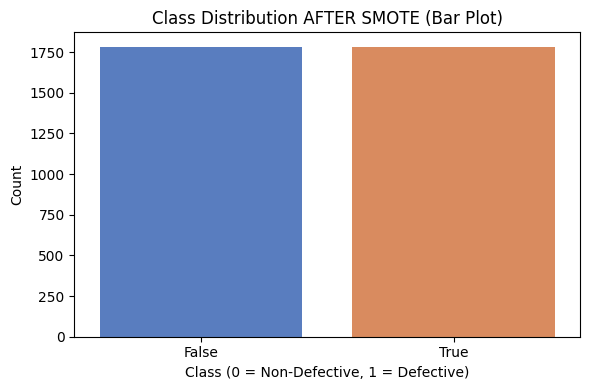

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette="muted")
plt.title("Class Distribution AFTER SMOTE (Bar Plot)")
plt.xlabel("Class (0 = Non-Defective, 1 = Defective)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight={0:1, 1:5}, random_state=42),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [33]:
results = []


🔹 Training Logistic Regression

📊 Metrics for Logistic Regression:
✅ Accuracy: 0.7353
✅ Precision: 0.7444
✅ Recall: 0.7300
✅ F1-Score: 0.7371
✅ ROC-AUC: 0.8161
✅ MCC: 0.4707

               precision    recall  f1-score   support

       False       0.73      0.74      0.73       351
        True       0.74      0.73      0.74       363

    accuracy                           0.74       714
   macro avg       0.74      0.74      0.74       714
weighted avg       0.74      0.74      0.74       714



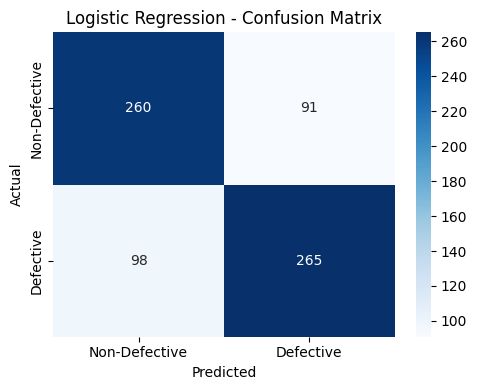


🔹 Training Decision Tree

📊 Metrics for Decision Tree:
✅ Accuracy: 0.8683
✅ Precision: 0.8810
✅ Recall: 0.8567
✅ F1-Score: 0.8687
✅ ROC-AUC: 0.8651
✅ MCC: 0.7370

               precision    recall  f1-score   support

       False       0.86      0.88      0.87       351
        True       0.88      0.86      0.87       363

    accuracy                           0.87       714
   macro avg       0.87      0.87      0.87       714
weighted avg       0.87      0.87      0.87       714



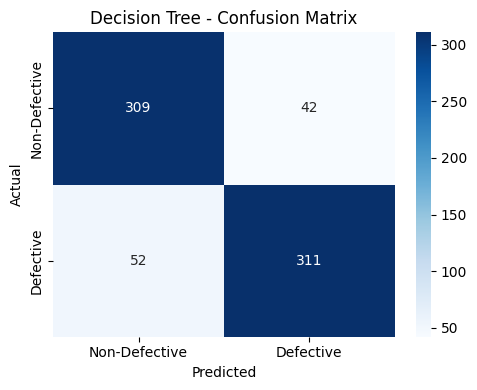


🔹 Training Random Forest

📊 Metrics for Random Forest:
✅ Accuracy: 0.9062
✅ Precision: 0.8854
✅ Recall: 0.9366
✅ F1-Score: 0.9103
✅ ROC-AUC: 0.9704
✅ MCC: 0.8135

               precision    recall  f1-score   support

       False       0.93      0.87      0.90       351
        True       0.89      0.94      0.91       363

    accuracy                           0.91       714
   macro avg       0.91      0.91      0.91       714
weighted avg       0.91      0.91      0.91       714



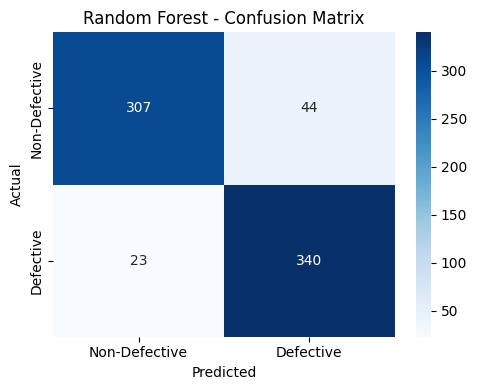


🔹 Training SVM

📊 Metrics for SVM:
✅ Accuracy: 0.7549
✅ Precision: 0.7410
✅ Recall: 0.7961
✅ F1-Score: 0.7676
✅ ROC-AUC: 0.8292
✅ MCC: 0.5105

               precision    recall  f1-score   support

       False       0.77      0.71      0.74       351
        True       0.74      0.80      0.77       363

    accuracy                           0.75       714
   macro avg       0.76      0.75      0.75       714
weighted avg       0.76      0.75      0.75       714



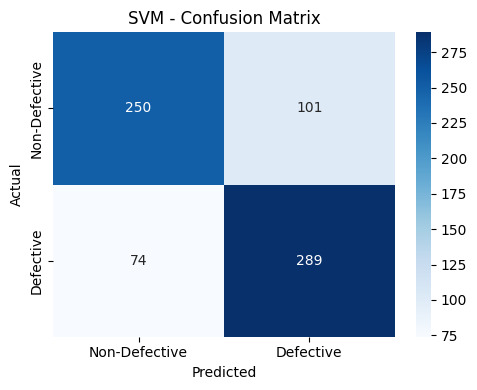


🔹 Training Naive Bayes

📊 Metrics for Naive Bayes:
✅ Accuracy: 0.6457
✅ Precision: 0.8022
✅ Recall: 0.4022
✅ F1-Score: 0.5358
✅ ROC-AUC: 0.7930
✅ MCC: 0.3437

               precision    recall  f1-score   support

       False       0.59      0.90      0.71       351
        True       0.80      0.40      0.54       363

    accuracy                           0.65       714
   macro avg       0.70      0.65      0.62       714
weighted avg       0.70      0.65      0.62       714



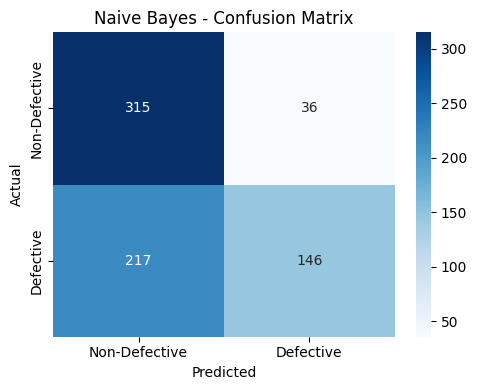


🔹 Training XGBoost

📊 Metrics for XGBoost:
✅ Accuracy: 0.9160
✅ Precision: 0.9220
✅ Recall: 0.9118
✅ F1-Score: 0.9169
✅ ROC-AUC: 0.9631
✅ MCC: 0.8320

               precision    recall  f1-score   support

       False       0.91      0.92      0.92       351
        True       0.92      0.91      0.92       363

    accuracy                           0.92       714
   macro avg       0.92      0.92      0.92       714
weighted avg       0.92      0.92      0.92       714



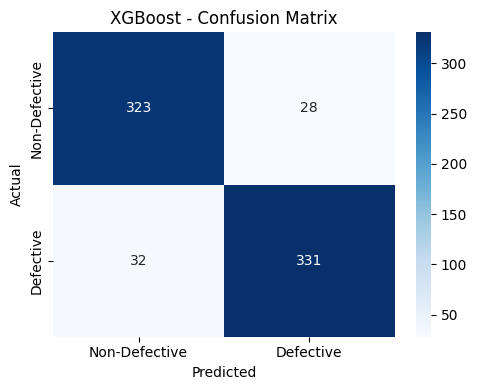

In [35]:
for name, model in models.items():
    print(f"\n🔹 Training {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    mcc = matthews_corrcoef(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": auc,
        "MCC": mcc
    })

    print(f"\n📊 Metrics for {name}:")
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ Precision: {prec:.4f}")
    print(f"✅ Recall: {rec:.4f}")
    print(f"✅ F1-Score: {f1:.4f}")
    print(f"✅ ROC-AUC: {auc:.4f}")
    print(f"✅ MCC: {mcc:.4f}")
    print("\n", classification_report(y_test, y_pred))

    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Defective', 'Defective'],
                yticklabels=['Non-Defective', 'Defective'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


In [37]:
results_df = pd.DataFrame(results)

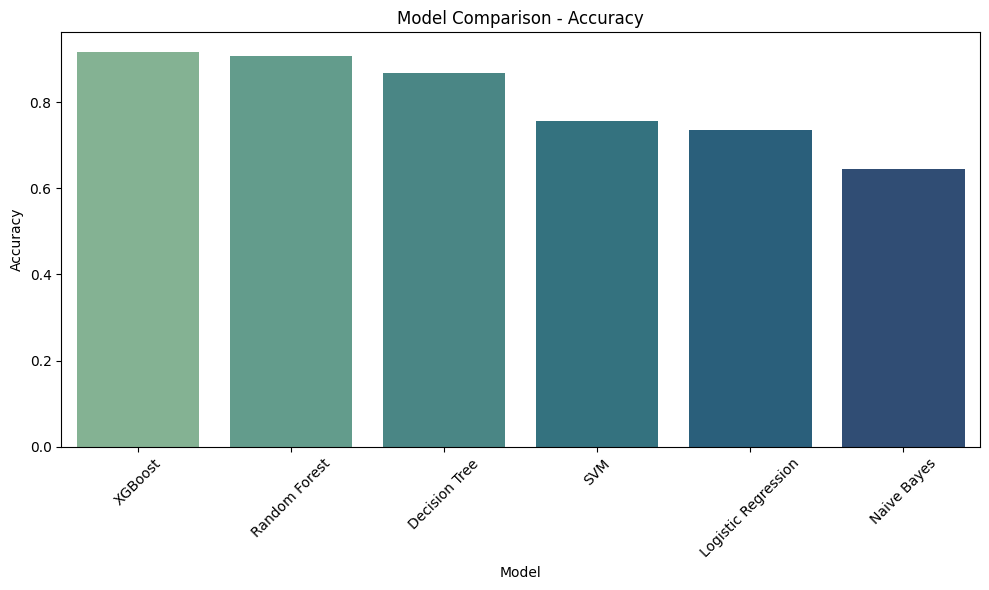

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df.sort_values(by='Accuracy', ascending=False), palette='crest')
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# Convert Tables 1 & 2 into bar charts for NASA PDF clarity
table1_data = pd.DataFrame({
    'Software': ['ant', 'prop', 'synapse'],
    'Defective (%)': [26.2, 15.3, 27.0]
})

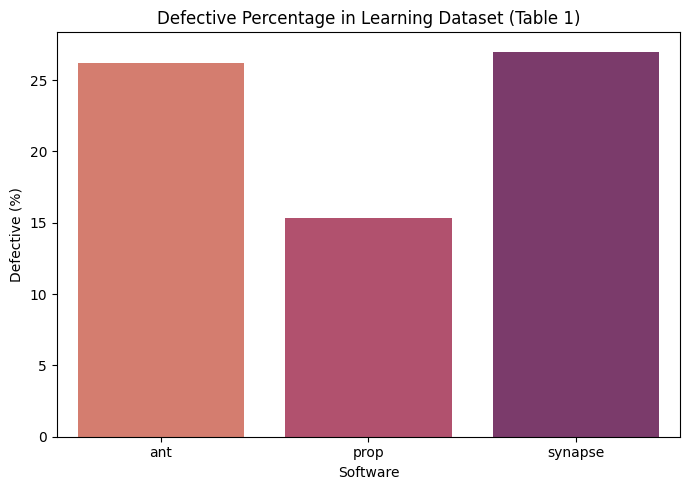

In [47]:
# Bar chart for Table 1
plt.figure(figsize=(7, 5))
sns.barplot(x='Software', y='Defective (%)', data=table1_data, palette='flare')
plt.title('Defective Percentage in Learning Dataset (Table 1)')
plt.ylabel('Defective (%)')
plt.tight_layout()
plt.show()

In [43]:
table2_data = pd.DataFrame({
    'Software': ['ant', 'prop', 'synapse'] * 3,
    'Overlooking (%)': [0,0,0, 80,80,80, 100,100,100],
    'AUC': [0.74,0.63,0.70, 0.56,0.53,0.55, 0.55,0.49,0.51],
    'F1 Score': [0.56,0.26,0.61, 0.28,0.16,0.30, 0.46,0.11,0.26]
})

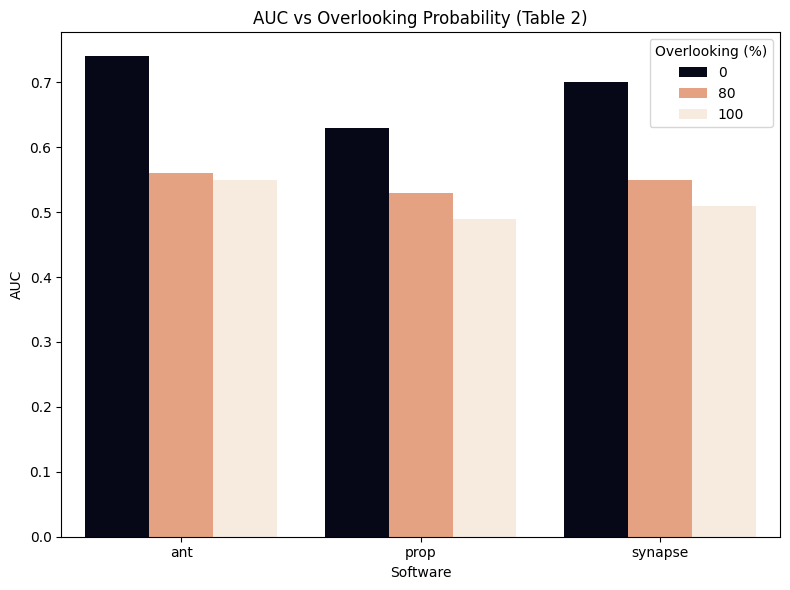

In [49]:
# Bar charts for Table 2 - AUC
plt.figure(figsize=(8, 6))
sns.barplot(x='Software', y='AUC', hue='Overlooking (%)', data=table2_data, palette='rocket')
plt.title('AUC vs Overlooking Probability (Table 2)')
plt.ylabel('AUC')
plt.tight_layout()
plt.show()

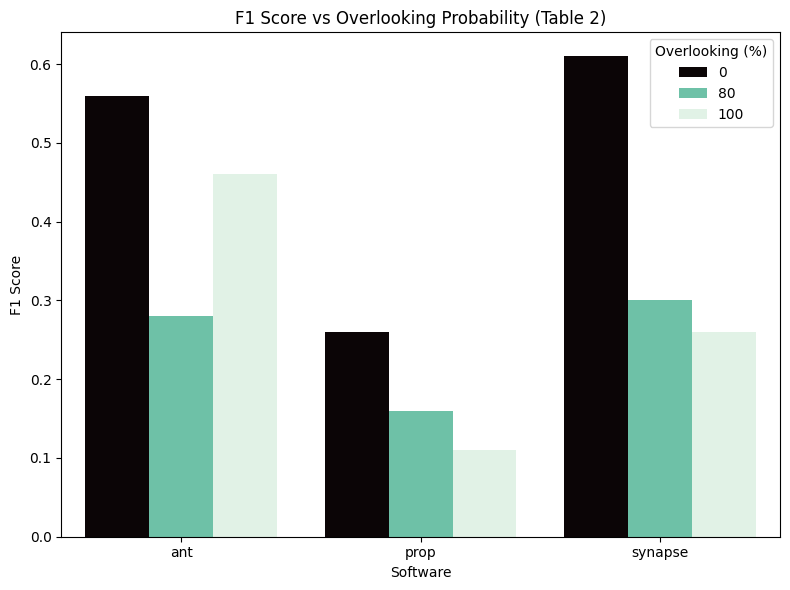

In [51]:
# Bar charts for Table 2 - F1 Score
plt.figure(figsize=(8, 6))
sns.barplot(x='Software', y='F1 Score', hue='Overlooking (%)', data=table2_data, palette='mako')
plt.title('F1 Score vs Overlooking Probability (Table 2)')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()